# Imports and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/16024/Desktop/CLass Dojo/Hypothesis Testing Core.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

ALPHA IS .05

#  Q1. Do smokers have higher insurance charges than non-smokers?

# Null and Alternative Hypothesis

Null- There is no difference in prices between smokers and non smokers.

Alternative- There is a difference in prices between smokers and non smokers.

The Alpha value is 0.05.

The correct test for this data type and number of samples is an independent t test because this is a two sample numeric data set.

The assumptions are:
* No significant outliers
* Normality
* Equal Variance

# Splitting the Data

In [4]:
smoker_df = df[df["smoker"]=="yes"]
smoker_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
11,62,female,26.29,0,yes,southeast,27808.72510
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
23,34,female,31.92,1,yes,northeast,37701.87680
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
38,35,male,36.67,1,yes,northeast,39774.27630
39,60,male,39.90,0,yes,southwest,48173.36100


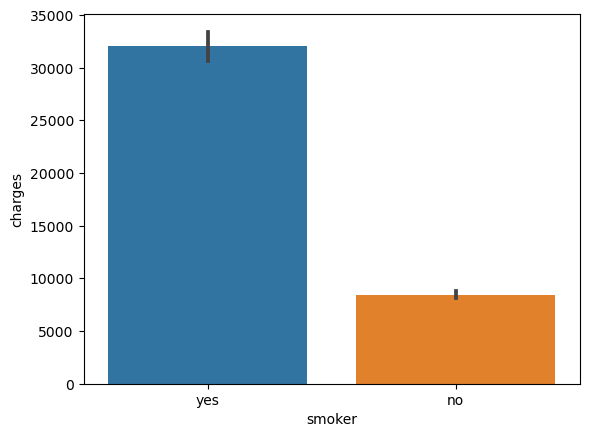

In [5]:
ax = sns.barplot(data=df, x="smoker", y="charges", ci = 95)

In [6]:
nonsmoker_df = df[df["smoker"]=="no"]
nonsmoker_df.head(10)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692
10,25,male,26.220,0,no,northeast,2721.32080


In [7]:
df["smoker"].value_counts() # This line of code tells me how many observations
# there are in both groups. Since both groups are above 15 for sample size, 
# this would negate the need for a normality test.

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
smoker_charge = smoker_df['charges']
smoker_charge.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [9]:
nonsmoker_charge = nonsmoker_df['charges']
nonsmoker_charge.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

# Testing for the normal distribution in the Smoker DF

In [10]:
# data = df['runtime'].copy()
result = stats.normaltest(smoker_df["charges"])
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


True

# The Smoker DF is not normally distributed.
This can be seen by the pvalue.  It is less than 0.05.

# Testing for the normal distribution in the Non Smoker DF

In [11]:
# data = df["runtime"].copy()
result = stats.normaltest(nonsmoker_df["charges"])
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)


True

# The Non Smoker DF is not normally distributed.

This can be seen in the pvalue.  It is less than 0.05.

In [12]:
result = stats.levene(smoker_df["charges"], nonsmoker_df["charges"])
result

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

# The Levene Test Results

Because the pvalue is below 0.05, this shows that I reject the Null Hypothesis because the Equal Variance is false.

#  Outliers

There are none in the Charges DF, but there are 24 in the Smokers DF.

In [13]:
zscores_s = stats.zscore(smoker_charge)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [14]:
zscores_ns = stats.zscore(nonsmoker_charge)
outliers_ns = abs(zscores_ns)>3
np.sum(outliers_ns)

24

# Removing the Outliers

In [15]:
# remove outlier for non smoker group
nonsmoker_charge = nonsmoker_charge[(np.abs(stats.zscore(nonsmoker_charge)) < 3)]

# Run the T Test

In [16]:
result = stats.ttest_ind(smoker_charge, nonsmoker_charge, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

# Result of the T Test

The pvalue is less than 0.05.  That tells us to reject the null hypothesis and accept that there is a significant difference in the cost of insurances between being a smoker and non smoker.

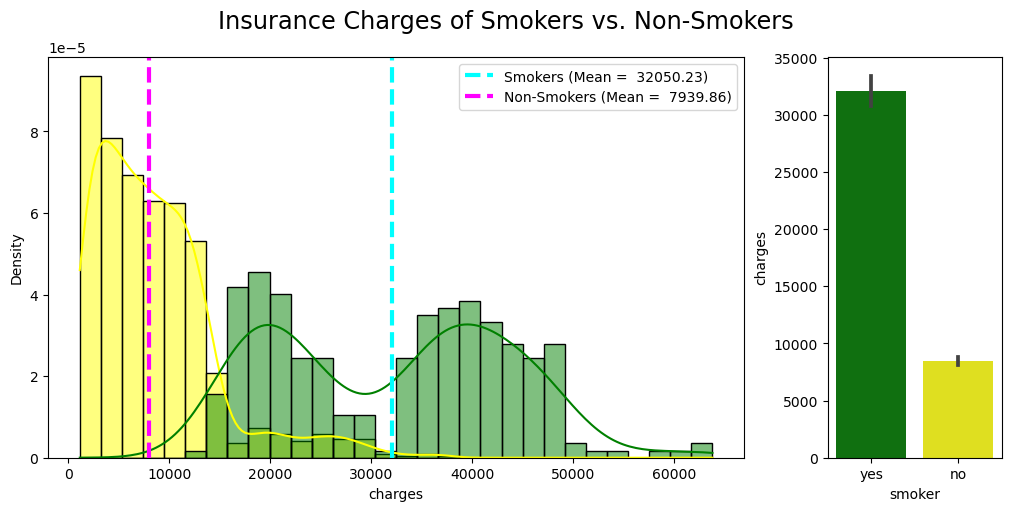

In [17]:

# specify colors
colors = {'yes': 'green', "no": 'yellow', 
          'yes_avg' : 'cyan', 'no_avg' : 'fuchsia'}

# visualize means
fig, (ax, ax_bar) = plt.subplots(figsize = (10, 5), ncols = 2, 
                                 constrained_layout = True,
                                 gridspec_kw = {'width_ratios': [0.8, 0.2]})

# histogram
ax = sns.histplot(data = df, x = 'charges', fill = True, hue = 'smoker', 
                  kde = True, stat = 'density', common_norm = False, ax = ax, 
                  palette = colors)

ax.axvline(np.mean(smoker_charge), ls = '--', lw = 3, 
           label = f"Smokers (Mean = {np.mean(smoker_charge): .2f})",
           color = colors['yes_avg'])

ax.axvline(np.mean(nonsmoker_charge), ls = '--', lw = 3, 
           label = f"Non-Smokers (Mean = {np.mean(nonsmoker_charge): .2f})",
           color = colors['no_avg'])

ax.legend(prop = {"size": 10}, loc = 'best')

# barplot
sns.barplot(data = df, x = 'smoker', y = 'charges', ax = ax_bar,
            palette = colors)

fig.suptitle('Insurance Charges of Smokers vs. Non-Smokers', fontsize = 'xx-large');

# Q2. Are men more likely to smoke than women?

The Null Hypothesis is men are not more likely to smoke than women.

The Alternative Hypothesis is men are more likely to smoke than women.

Alpha value = 0.05

Because the data for this question is categorical, I will be using the Chi-Square Test to answer the question.

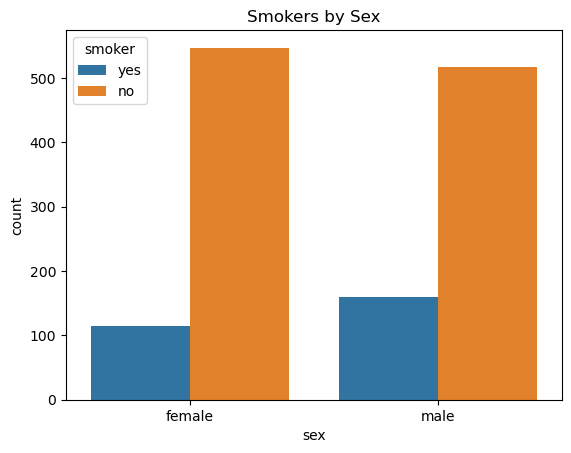

In [18]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Smokers by Sex");

# Contingency Table

This will show us how many smokers were male or female.  It will also show us if the male or female was a smoker or not.

In [19]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [20]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [21]:
print(p)
p<.05

0.006548143503580696


True

# PValue for the Chi-Squared Table

This shows us that we will reject the null hypothesis that men are more likely to smoke than women.

# Q3. Do different regions have different charges, on average?

Null Hypothesis - Different regions have the same charges.

Alternative Hypothesis - Different regions do not have the same charges.

Alpha Value = 0.05

I will be using the ANOVA test because there are 4 different groups I am testing and they are numerical.

The assumptions I will be testing are:

* Normality

* Equal Variance

* No significant outliers

In [22]:
# Numerical threshold for sample sizes
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

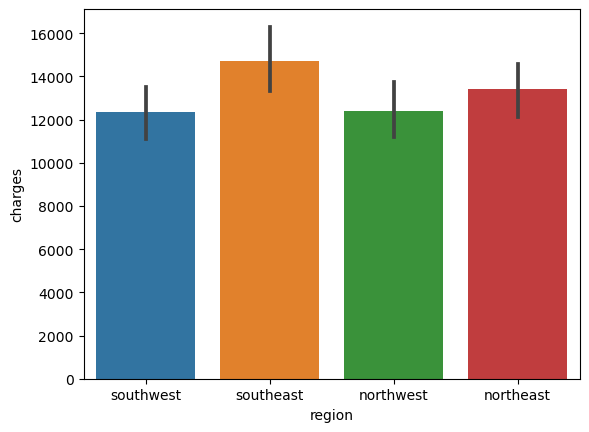

In [23]:
ax = sns.barplot(data=df, x="region", y="charges");

# Creating a dictionary for the Groups

In [24]:
## Create groups dictionary. There are 4 groups
groups = {}
## Loop through all unique categories
for i in df["region"].unique():
    ## Get series for group and rename
    data = df.loc[df["region"]==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [25]:
groups.values()

dict_values([0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64, 1        1725.5523
2        4449.4620
5        3756.6216
6        8240.5896
11      27808.7251
           ...    
1322    12981.3457
1323    43896.3763
1327     9377.9047
1330    12629.1656
1335     1629.8335
Name: charges, Length: 364, dtype: float64, 3       21984.47061
4        3866.85520
7        7281.50560
9       28923.13692
24       6203.90175
           ...     
1319     7201.70085
1320     5425.02335
1324     4239.89265
1333    10600.54830
1337    29141.36030
Name: charges, Length: 325, dtype: float64, 8        6406.41070
10       2721.32080
16      10797.33620
17       2395.17155
20      13228.84695
           ...     
1321    28101.33305
1325    13143.33665
1326     7050.02130
1328    22395.74424
1334  

# Testing Assumption on the Group

Normality Assumption Group

In [26]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':round(p,5),
                             'test stat':round(stat,5)}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,0.0,102.29406
southeast,364.0,0.0,65.87745
northwest,325.0,0.0,107.23285
northeast,324.0,0.0,86.74763


# Results

Because the data is not normally distributed, we reject the null hypothesis.  The ANOVA test will still continue because we have more then 15 sample sets in this data.

# Equal Variance Assumption Test

In [27]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

 # Results
 
 Because the pvalue is much less than 0.05, we are rejecting the null hypothesis of equal variance.  It doesn't have equal variance so we can't use the ANOVE testing.  We will try the Kruskal=Wallis test because it uses the median instead of mean.  The Kruskal-Wallis test is a non-parametric test, which makes it easier to use the median and not have to rely on the outliers for information.

# Krustal-Wallis Test

In [28]:
result = stats.kruskal(*groups.values())
print(result)
print(f"Rounded T-statistic: {round(result.statistic, 5)}")
print(f"Rounded p-value: {round(result.pvalue, 5)}")

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)
Rounded T-statistic: 4.73418
Rounded p-value: 0.19233


# Results
The pvalue on this test is larger than 0.05.  Because of that, we will fail to reject the null hypothesis of different regions having the same insurance charges.  The difference is not statisctically significant per region.